# KNN (similar to knn.ipynb but testing and training data both with the same dataset which is my playlist) and then testing it on the test dataset

In [2]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def spotify(client_id, client_secret):
    # Authenticate
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

# Set up the credentials
with open('config.json') as config_file:
    config = json.load(config_file)

client_id = config['client_id']['0']
client_secret = config['client_secret']['0']

sp = spotify(client_id, client_secret)


## Import training data and drop irrelevant columns/features

In [3]:
df = pd.read_csv("my_songs.csv")
df

,Unnamed: 0,playlist,id,name,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Its time,2FoahzOSxJnalPA8aBUme3,all of me,Rap,0.652,0.80600,5,-5.707,0,...,0.000011,0.8420,0.779,159.947,audio_features,spotify:track:2FoahzOSxJnalPA8aBUme3,https://api.spotify.com/v1/tracks/2FoahzOSxJna...,https://api.spotify.com/v1/audio-analysis/2Foa...,198293,4
1,1,Its time,6x9pCndnXEoea0CMcfjs9W,n.h.i.e.,Rap,0.818,0.51200,5,-9.056,0,...,0.037100,0.1100,0.153,131.974,audio_features,spotify:track:6x9pCndnXEoea0CMcfjs9W,https://api.spotify.com/v1/tracks/6x9pCndnXEoe...,https://api.spotify.com/v1/audio-analysis/6x9p...,143719,4
2,2,Its time,2FDTHlrBguDzQkp7PVj16Q,Sprinter,Rap,0.918,0.68100,1,-4.705,1,...,0.000000,0.0615,0.706,139.057,audio_features,spotify:track:2FDTHlrBguDzQkp7PVj16Q,https://api.spotify.com/v1/tracks/2FDTHlrBguDz...,https://api.spotify.com/v1/audio-analysis/2FDT...,229133,4
3,3,Its time,5KI7I4mEtulXcv5VQJaV35,just like me,Rap,0.701,0.65300,1,-4.695,1,...,0.000028,0.3060,0.505,82.984,audio_features,spotify:track:5KI7I4mEtulXcv5VQJaV35,https://api.spotify.com/v1/tracks/5KI7I4mEtulX...,https://api.spotify.com/v1/audio-analysis/5KI7...,231338,4
4,4,Its time,4yLyVdEqV790aIXyGif85v,red sky,Rap,0.474,0.62100,7,-8.253,0,...,0.000000,0.1600,0.396,114.314,audio_features,spotify:track:4yLyVdEqV790aIXyGif85v,https://api.spotify.com/v1/tracks/4yLyVdEqV790...,https://api.spotify.com/v1/audio-analysis/4yLy...,176835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,284,Old,6crfO56bDm0RjpctUuGs5X,I'm In The Mood For Love,Old,0.580,0.05450,9,-14.594,0,...,0.000265,0.0967,0.177,123.341,audio_features,spotify:track:6crfO56bDm0RjpctUuGs5X,https://api.spotify.com/v1/tracks/6crfO56bDm0R...,https://api.spotify.com/v1/audio-analysis/6crf...,149827,4
285,285,Old,4l9hml2UCnxoNI3yCdL1BW,My Funny Valentine,Old,0.438,0.00756,0,-26.440,0,...,0.006430,0.1090,0.277,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133,4
286,286,Old,7Kqk5EpwqiukPkDutSFFZk,Did I Remember,Old,0.677,0.26400,8,-9.111,1,...,0.006010,0.0825,0.438,120.974,audio_features,spotify:track:7Kqk5EpwqiukPkDutSFFZk,https://api.spotify.com/v1/tracks/7Kqk5Epwqiuk...,https://api.spotify.com/v1/audio-analysis/7Kqk...,206653,4
287,287,Old,1sJnKCMOkGvcRPes8Tln2x,My Kind of Night,Old,0.840,0.17800,10,-11.133,1,...,0.000000,0.1130,0.529,114.412,audio_features,spotify:track:1sJnKCMOkGvcRPes8Tln2x,https://api.spotify.com/v1/tracks/1sJnKCMOkGvc...,https://api.spotify.com/v1/audio-analysis/1sJn...,123711,4


In [4]:
drop_columns = ['Unnamed: 0', 'playlist', 'type', 'id', 'name', 'uri', 'track_href', 'analysis_url']

df_knn = df.drop(columns=drop_columns)

df_knn

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Rap,0.652,0.80600,5,-5.707,0,0.3020,0.1220,0.000011,0.8420,0.779,159.947,198293,4
1,Rap,0.818,0.51200,5,-9.056,0,0.0884,0.0963,0.037100,0.1100,0.153,131.974,143719,4
2,Rap,0.918,0.68100,1,-4.705,1,0.2010,0.2630,0.000000,0.0615,0.706,139.057,229133,4
3,Rap,0.701,0.65300,1,-4.695,1,0.1050,0.4790,0.000028,0.3060,0.505,82.984,231338,4
4,Rap,0.474,0.62100,7,-8.253,0,0.1030,0.1870,0.000000,0.1600,0.396,114.314,176835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Old,0.580,0.05450,9,-14.594,0,0.0473,0.9630,0.000265,0.0967,0.177,123.341,149827,4
285,Old,0.438,0.00756,0,-26.440,0,0.0382,0.9410,0.006430,0.1090,0.277,133.320,141133,4
286,Old,0.677,0.26400,8,-9.111,1,0.0357,0.9040,0.006010,0.0825,0.438,120.974,206653,4
287,Old,0.840,0.17800,10,-11.133,1,0.0700,0.9730,0.000000,0.1130,0.529,114.412,123711,4


## Scale features to ensure fairness

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df_knn.drop('genre', axis = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df_knn.drop('genre', axis = 1))

In [9]:
df_feat = pd.DataFrame(scaled_features, columns = df_knn.columns[1:])
df_feat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.298154,1.909276,0.014842,0.928430,-1.266335,1.970345,-1.320475,-0.409573,6.097448,2.244916,1.484358,-0.008676,0.32655
1,1.212476,0.673546,0.014842,0.446438,-1.266335,-0.122286,-1.392112,-0.277711,-0.472223,-1.014116,0.607365,-0.770294,0.32655
2,1.763272,1.383880,-1.128989,1.072639,0.789681,0.980852,-0.927450,-0.409612,-0.907508,1.864869,0.829427,0.421717,0.32655
3,0.568044,1.266192,-1.128989,1.074078,0.789681,0.040344,-0.325370,-0.409511,1.286869,0.818438,-0.928541,0.452489,0.32655
4,-0.682263,1.131691,0.586758,0.562007,-1.266335,0.020750,-1.139293,-0.409612,-0.023475,0.250971,0.053699,-0.308137,0.32655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.098419,-1.249400,1.158674,-0.350597,-1.266335,-0.524941,1.023737,-0.408669,-0.591590,-0.889170,0.336708,-0.685052,0.32655
285,-0.880550,-1.446696,-1.414947,-2.055487,-1.266335,-0.614093,0.962414,-0.386751,-0.481198,-0.368557,0.649564,-0.806383,0.32655
286,0.435853,-0.368838,0.872716,0.438522,0.789681,-0.638586,0.859280,-0.388244,-0.719034,0.469628,0.262499,0.107993,0.32655
287,1.333651,-0.730309,1.444631,0.147514,0.789681,-0.302550,1.051611,-0.409612,-0.445298,0.943385,0.056771,-1.049519,0.32655


In [10]:
from sklearn.model_selection import train_test_split

## Split, train and test our training dataset using knn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_feat
y = df_knn['genre']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

## How did our model do?

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, pred))

[[ 5  0  0  0  0  0]
 [ 0  4  2  3  0  0]
 [ 0  1  5  3  1  4]
 [ 0  0  1  5  0  0]
 [ 0  0  2  0 11  1]
 [ 0  2  2  0  0  6]]


In [20]:
print(classification_report(y_test, pred, zero_division=0))
correct_predictions = (y_test == pred).sum()
incorrect_predictions = (y_test != pred).sum()

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         5
      Covers       0.57      0.44      0.50         9
        Easy       0.42      0.36      0.38        14
         Old       0.45      0.83      0.59         6
         Rap       0.92      0.79      0.85        14
         RnB       0.55      0.60      0.57        10

    accuracy                           0.62        58
   macro avg       0.65      0.67      0.65        58
weighted avg       0.64      0.62      0.62        58

Correct predictions: 36
Incorrect predictions: 22


## Find the best n neighbors

In [21]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

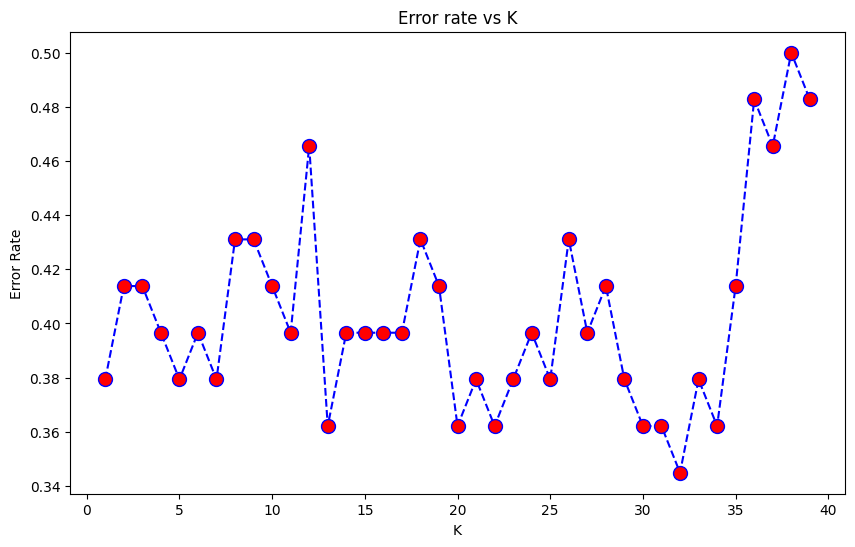

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10 )
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn = KNeighborsClassifier(n_neighbors=14)

In [31]:
knn = KNeighborsClassifier(n_neighbors=14)

In [32]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=14)

In [31]:
knn = KNeighborsClassifier(n_neighbors=14)

In [24]:
knn = KNeighborsClassifier(n_neighbors=14)

## Train our data with n = 14 since it has relatively low errors

In [26]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=14)

In [27]:
pred = knn.predict(X)

## How did our model do?

In [28]:
print(confusion_matrix(y, pred))

[[32  1  2  4  0  0]
 [ 0 20  8  6  0  2]
 [ 0 14 30  6  8  8]
 [ 1  3  5 25  0  0]
 [ 0  0  8  0 46  8]
 [ 0  2 16  1  3 30]]


In [29]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

   Classical       0.97      0.82      0.89        39
      Covers       0.50      0.56      0.53        36
        Easy       0.43      0.45      0.44        66
         Old       0.60      0.74      0.66        34
         Rap       0.81      0.74      0.77        62
         RnB       0.62      0.58      0.60        52

    accuracy                           0.63       289
   macro avg       0.66      0.65      0.65       289
weighted avg       0.65      0.63      0.64       289



In [30]:
correct_predictions = (y == pred).sum()
incorrect_predictions = (y != pred).sum()

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


Correct predictions: 183
Incorrect predictions: 106


## Importing our test dataset and dropping irrelevant features/columns.
## Then test our model using this test dataset and see how it does

In [31]:
test = pd.read_csv('test.csv')
test
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'time_signature', 'genre'
]

df_testing = test[~test['track_name'].isin(df.name)].copy()
df_test = df_testing[features].copy()

scaled_features_test = scaler.transform(df_test.drop('genre', axis = 1))
X_test = pd.DataFrame(scaled_features_test, columns = df_test.columns[:-1])
y_test = df_test['genre']

In [32]:
pred_test = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test, pred_test))

[[99  0  0  1  0  0]
 [ 1 36 34 13  0 12]
 [ 1 14 38  6  1 11]
 [ 3 31 35 21  5  4]
 [ 0  0  6  0 60 25]
 [ 0  0 27  0 17 43]]


In [34]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

   Classical       0.95      0.99      0.97       100
      Covers       0.44      0.38      0.41        96
        Easy       0.27      0.54      0.36        71
         Old       0.51      0.21      0.30        99
         Rap       0.72      0.66      0.69        91
         RnB       0.45      0.49      0.47        87

    accuracy                           0.55       544
   macro avg       0.56      0.54      0.53       544
weighted avg       0.58      0.55      0.54       544



In [35]:
correct_predictions = (y_test == pred_test).sum()
incorrect_predictions = (y_test != pred_test).sum()

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


Correct predictions: 297
Incorrect predictions: 247


## Let's see which songs are being put in the wrong genre and see if it make sense

In [36]:
features = ['track_name', 'genre']
test_final = df_testing[features].copy()
test_final['predicted_genre'] = pred_test


mismatched_predictions = test_final[(test_final['genre'] != test_final['predicted_genre']) & (test_final['predicted_genre'] == 'Old')]
mismatched_predictions

,track_name,genre,predicted_genre
248,"Variations on a Rococo Theme, Op. 33, TH 57: V...",Classical,Old
298,Dancing in the Dark,Covers,Old
299,Sweet Child Of Mine,Covers,Old
309,Stay With Me - Live From Spotify Berlin,Covers,Old
319,La Vie En Rose,Covers,Old
329,Kathy’s Song - Recorded at Spotify Studios NYC,Covers,Old
339,Can't Help Falling In Love,Covers,Old
340,Something,Covers,Old
343,Riptide,Covers,Old
356,Every Breath You Take (feat. Liza Anne),Covers,Old
